<div style="direction:rtl;text-align:center"><img src="https://dl.mohammadkh.ir/logo.png" alt="Mohammadkh.ir" style="width: 250px;"/></div>
<h1><div style="direction:rtl;text-align:center">PreProcessing</div></h1>

In [1]:
from urllib import request
import tarfile
import os
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import mahotas

## database

In [2]:
# filename, _ = request.urlretrieve('https://www.robots.ox.ac.uk/~vgg/data/flowers/17/17flowers.tgz', 'flowers.tgz')

In [3]:
# print(os.stat(filename))

In [4]:
# tar = tarfile.open(filename)
# tar.extractall(path='../__data/17 flowers/train_data')
# tar.close()

In [5]:
# image_paths = sorted(glob.glob('../__data/17 flowers/train_data/jpg/*.jpg'))

In [6]:
# image_paths[:6]

In [7]:
# class_names = [
#     'Buttercup', 'ColtsFoot', 'Daffodil', 'Daisy', 'Dandelion', 'Fritillary', 'Iris', 'Pansy', 'Sunflower', 'Windflower',
#     'Snowdrop', 'LilyValley', 'Bluebell', 'Crocus', 'Tigerlily', 'Tulip', 'Cowslip']

# l, i, j = 0, 0, 80

# for k in range(1, len(class_names)+1):
#     os.makedirs('../__data/17 flowers/train_data/' + class_names[l])
#     current_path = '../__data/17 flowers/train_data/' + class_names[l] + '/'
#     for index, image_path in enumerate(image_paths[i:j], start=1):
#         original = image_path
#         image_path = image_path.split('/')
#         image_file_name = str(index) + '.jpg'
#         os.rename(original, current_path + image_file_name)
#     l += 1
#     i += 80
#     j += 80


## Open cv

In [4]:
image = cv2.imread('../__data/17 flowers/train_data/Bluebell/1.jpg')

In [5]:
# resize image
image = cv2.resize(image, (500, 500))

## Histogram

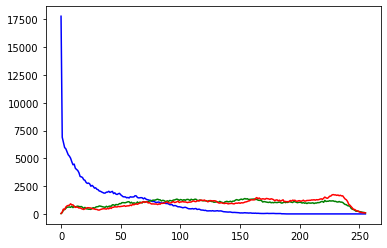

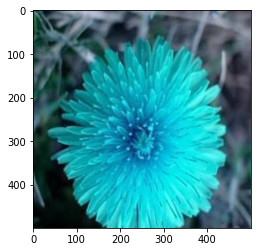

In [10]:
# calculater hist
hist = cv2.calcHist([image], [0, 1, 2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
# cv2.calcHist(image_file, number_chanell(r=0 g=1 b=2), mask, number_bin_hist, rang_pix)
cv2.normalize(hist, hist)
image_histogram = hist.flatten()
for channel, col in enumerate(('b', 'g', 'r')):
        hist = cv2.calcHist([image], [channel], None, [256], [0, 256])
        plt.plot(hist, color=col)
plt.figure()
plt.imshow(image)

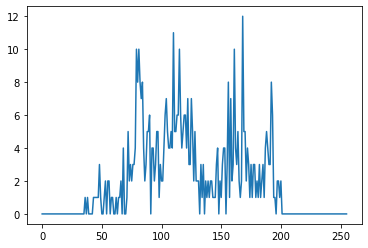

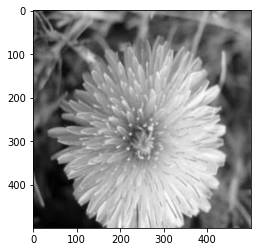

In [11]:
# convert color image
image_Gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist(image_Gray, [0], None, [256], [0,256])
plt.plot(hist)
plt.figure()
plt.imshow(image_Gray,cmap='gray')

# select futures
### color image = gray

## HuMoments 

In [12]:
hue_features = cv2.HuMoments(cv2.moments(image_Gray)).flatten()

In [13]:
hue_features

array([ 1.13392479e-03,  2.14724995e-08,  2.09009561e-11,  2.08437379e-11,
       -2.86869638e-22,  2.78466073e-15, -3.27079017e-22])

## Mahotas 

In [14]:
haralick_features = mahotas.features.haralick(image_Gray).mean(axis=0)

In [15]:
haralick_features

array([ 3.39143648e-04,  4.21299875e+01,  9.93703345e-01,  3.34561367e+03,
        2.91002169e-01,  2.47583364e+02,  1.33403247e+04,  8.75603276e+00,
        1.21067131e+01,  4.78213791e-04,  3.58528620e+00, -4.40240577e-01,
        9.99395292e-01])

# Mix Method

In [16]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [17]:
train_labels = os.listdir('../__data/17 flowers/train_data/')
train_labels.sort()
X = []
y = []
for label in train_labels:
    dir = os.path.join('../__data/17 flowers/train_data', label)
    current_label = label
#     print('Current Folder: ' + current_label)
    for x in range(1, 81):
#         print('Current Image: ' + str(x))
        file = os.path.join(dir, str(x) + '.jpg')
        image = cv2.imread(file)
        image = cv2.resize(image, (500, 500))
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
        cv2.normalize(hist, hist)
        histogram_features = hist.flatten()
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        hue_features = cv2.HuMoments(cv2.moments(image_gray)).flatten()
        haralick_features = mahotas.features.haralick(image_gray).mean(axis=0)
        current_features = np.hstack([histogram_features, hue_features, haralick_features])
        X.append(current_features)
        y.append(current_label)

In [18]:
le = LabelEncoder()
y = le.fit_transform(y)

mms = MinMaxScaler()
X = mms.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [20]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=400)

In [21]:
rfc.score(X_test, y_test)

0.6470588235294118

<div class="alert alert-block alert-info">
<div style="direction:rtl;text-align:left"><strong>PreProcessing</strong><br>MohammadReza <strong>Khajedaloi</strong><br><br>
</div>
<div style="direction:rtl;text-align:right">
<a href="http://mohammadkh.ir/">WebSite</a> - <a href="https://github.com/khajedaloi/">GitHub</a> - <a href="https://www.linkedin.com/in/mohammad-kh/">Linkedin</a>
</div>
</div>